In [ ]:
import os
import tensorflow.keras as keras
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
import pickle as p
import glob
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Input, Masking

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = "/content/drive/MyDrive/assignment2/CV_Data01"
classes = ['ba', 'hai','hI', 'ka','ni']
data_split = ['Test', 'Train']

In [ ]:
Y_train = []
X_train = []
X_test = []
Y_test = []

dir_list = os.listdir(file_path)
print(dir_list)
for j in data_split:
    for i in classes:
        for filename in glob.glob(os.path.join(file_path + '/' + i + '/' + j, '*.mfcc')):
            with open(filename, 'r') as f:
                if (j == "Train"):
                    # print(filename)
                    f = open(filename)
                    parsed = f.readlines()
                    parsed = [np.array([float(val) for val in line.split(" ") if val!="\n"]) for line in parsed]
                    X_train.append(np.array(parsed))
                    Y_train.append(str(i))
                if (j == 'Test'):
                    # print(filename)
                    f = open(filename)
                    parsed = f.readlines()
                    parsed = [np.array([float(val) for val in line.split(" ") if val!="\n"]) for line in parsed]
                    X_test.append(np.array(parsed))
                    Y_test.append(str(i))
print("Training Set has {} samples each with dimension {} but variable length".format(len(X_train),X_train[0][0].shape))
print("Test Set has {} samples each with dimension {} but variable length".format(len(X_test),X_test[0][0].shape))


# padding input
max_len = max([len(val) for val in X_train])
print("Max_seq length: ",max_len)
def padd_it(data):
    for i in range(len(data)):
        if len(data[i]) <= max_len:
            seq = np.repeat(np.array([-1]*39).reshape(-1,39),int(max_len-len(data[i])),0)
            data[i] = np.append(data[i],seq,axis=0)
    return data
# data preprocessing steps to prepare the input data for training and testing a model
print("Before Padding shape of first element in train is {}".format((X_train[0]).shape))
X_test = np.asarray(padd_it(X_test))
X_train = np.asarray(padd_it(X_train))
print("After Padding shape of first element in train is {}".format((X_train[0]).shape))

['ka', 'ba', 'hI', 'ni', 'hai']
Training Set has 1570 samples each with dimension (39,) but variable length
Test Set has 393 samples each with dimension (39,) but variable length
Max_seq length:  78
Before Padding shape of first element in train is (15, 39)
After Padding shape of first element in train is (78, 39)


In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
X_train.shape

(1570, 78, 39)

In [ ]:
Y_train=np.array(Y_train).reshape(-1, 1)

In [ ]:
Y_test=np.array(Y_test).reshape(-1, 1)

In [ ]:
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder
#define ordinal encoding
encoder = OrdinalEncoder()
# transform data
yt= encoder.fit_transform(Y_train)
print(yt)

[[0.]
 [0.]
 [0.]
 ...
 [4.]
 [4.]
 [4.]]


In [ ]:
ytest= encoder.fit_transform(Y_test)
print(ytest)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.

In [ ]:
CV_RNN_Model1=Sequential()
CV_RNN_Model1.add(Masking(mask_value=-1,input_shape=X_train.shape[1:]))  # to mask values other then -1 (padded value that shall be ignored)
CV_RNN_Model1.add(SimpleRNN(32, return_sequences=False))
CV_RNN_Model1.add(Dropout(0.2))
CV_RNN_Model1.add(Dense(5, activation='softmax'))
CV_RNN_Model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking (Masking)           (None, 78, 39)            0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2304      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 5)                 165       
                                                                 
Total params: 2,469
Trainable params: 2,469
Non-trainable params: 0
_________________________________________________________________


In [ ]:
CV_RNN_Model1.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor="loss", min_delta=0.0001,patience=3)
history = CV_RNN_Model1.fit(X_train, yt, batch_size=32,callbacks=[callback] ,epochs=500,verbose=1)



Epoch 1/500
50/50 [==============================] - 3s 25ms/step - loss: 1.7388 - accuracy: 0.3497
Epoch 2/500
50/50 [==============================] - 2s 35ms/step - loss: 1.3610 - accuracy: 0.4631
Epoch 3/500
50/50 [==============================] - 2s 33ms/step - loss: 1.1859 - accuracy: 0.5274
Epoch 4/500
50/50 [==============================] - 1s 28ms/step - loss: 1.1131 - accuracy: 0.5567
Epoch 5/500
50/50 [==============================] - 2s 43ms/step - loss: 1.0376 - accuracy: 0.5803
Epoch 6/500
50/50 [==============================] - 2s 42ms/step - loss: 1.0086 - accuracy: 0.5834
Epoch 7/500
50/50 [==============================] - 1s 25ms/step - loss: 0.9635 - accuracy: 0.6076
Epoch 8/500
50/50 [==============================] - 1s 24ms/step - loss: 0.9150 - accuracy: 0.6306
Epoch 9/500
50/50 [==============================] - 1s 25ms/step - loss: 0.9025 - accuracy: 0.6401
Epoch 10/500
50/50 [==============================] - 1s 25ms/step - loss: 0.8824 - accuracy: 0.6478

In [ ]:
CV_RNN_Model1.save('/content/drive/MyDrive/CV_RNN_Model1.h5')

In [ ]:
#Save Model and Model Structure
CV_RNN_Model1.save('/content/drive/MyDrive/DLA6/CV_SAVE_Model/RNN_CV1L32.h5')
f=open('/content/drive/MyDrive/DLA6/CV_SAVE_Model/RNN_CV_HIST1L32.pckl','wb')
p.dump(history.history,f)
f.close()

In [ ]:
# Extract the loss values from the history object
training_loss = history.history['loss']

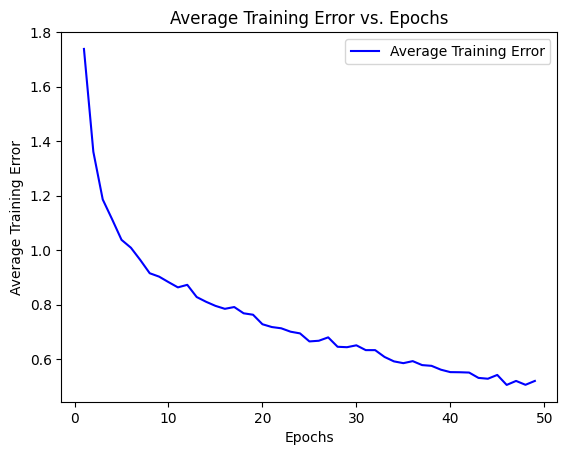

In [ ]:
#Plot the training loss against epochs
epochs = range(1, len(training_loss) + 1)
plt.plot(epochs, training_loss, 'b', label='Average Training Error')
plt.xlabel('Epochs')
plt.ylabel('Average Training Error')
plt.title('Average Training Error vs. Epochs')
plt.legend()
plt.show()

In [ ]:
CV_RNN_Model1.evaluate(X_train,yt)
CV_RNN_Model1.evaluate(X_test,ytest)

13/13 [==============================] - 0s 8ms/step - loss: 0.7439 - accuracy: 0.7328


[0.7439112663269043, 0.732824444770813]

In [ ]:
#Evaluating the model
print('\nEvaluation of model on train data:')
trainAcc1=CV_RNN_Model1.evaluate(x=X_train,y=yt,batch_size=1, verbose="auto",callbacks=None)
print(CV_RNN_Model1.metrics_names)
print(trainAcc1)
print('\nEvaluation of model on test data:')
testAcc1=CV_RNN_Model1.evaluate(x=X_test, y=ytest, batch_size=1, verbose="auto",callbacks=None)
print(CV_RNN_Model1.metrics_names)
print(testAcc1)
print('\nPredictions for test data:')
testProb1=CV_RNN_Model1.predict(X_test, batch_size=1, verbose="auto", callbacks=None)
pred1=np.argmax(testProb1,axis=1)
confusionMatrix1=tf.math.confusion_matrix(ytest,pred1)
print(confusionMatrix1)


Evaluation of model on train data:
1570/1570 [==============================] - 11s 7ms/step - loss: 0.4414 - accuracy: 0.8306
['loss', 'accuracy']
[0.44135648012161255, 0.8305732607841492]

Evaluation of model on test data:
393/393 [==============================] - 3s 8ms/step - loss: 0.7439 - accuracy: 0.7328
['loss', 'accuracy']
[0.7439112663269043, 0.732824444770813]

Predictions for test data:
393/393 [==============================] - 2s 5ms/step
tf.Tensor(
[[ 47   2   6  17   0]
 [  0  34   5   1  12]
 [  4   8 109   5   0]
 [ 20   1   1  72   2]
 [  0  12   7   2  26]], shape=(5, 5), dtype=int32)


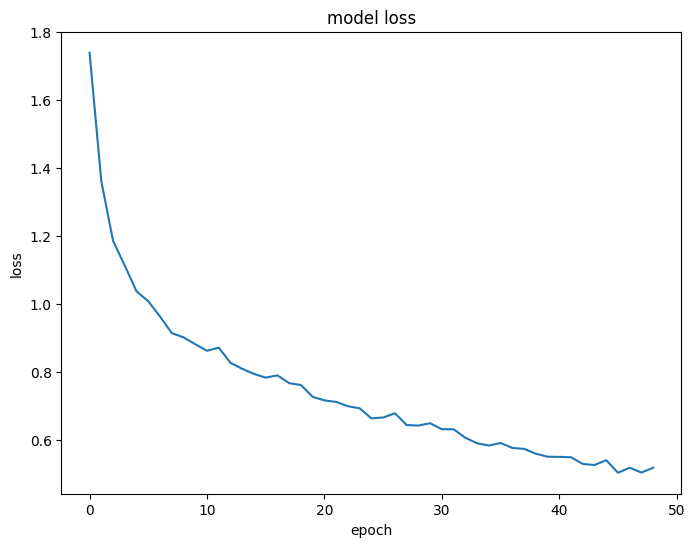

In [ ]:
plt.figure(figsize=(8, 6))
#plt.plot(history8.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

In [ ]:
es1= EarlyStopping(monitor='loss',min_delta=0.0001, patience=20,verbose=1)

In [ ]:
mask_value=0.0
model1 = Sequential()
model1.add(Masking(mask_value = -1 , input_shape = X_train.shape[1:]))
model1.add(SimpleRNN(units=64,return_sequences=True))
model1.add(Dropout(0.2))
#model.add(SimpleRNN(units=64,return_sequences=True))
#model.add(Dropout(0.2))
model1.add(SimpleRNN(units=64))
model1.add(Dense(units=5, activation='softmax'))
model1.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
#model1.summary()
history1=model1.fit(X_train, yt, callbacks=[es1],epochs=1000, batch_size=128)


Epoch 1/1000
13/13 [==============================] - 5s 106ms/step - loss: 1.3932 - accuracy: 0.4223
Epoch 2/1000
13/13 [==============================] - 1s 105ms/step - loss: 1.0463 - accuracy: 0.5529
Epoch 3/1000
13/13 [==============================] - 1s 105ms/step - loss: 0.9535 - accuracy: 0.6006
Epoch 4/1000
13/13 [==============================] - 1s 105ms/step - loss: 0.8782 - accuracy: 0.6306
Epoch 5/1000
13/13 [==============================] - 1s 103ms/step - loss: 0.8285 - accuracy: 0.6573
Epoch 6/1000
13/13 [==============================] - 1s 107ms/step - loss: 0.7849 - accuracy: 0.6866
Epoch 7/1000
13/13 [==============================] - 2s 153ms/step - loss: 0.7505 - accuracy: 0.6994
Epoch 8/1000
13/13 [==============================] - 4s 302ms/step - loss: 0.7107 - accuracy: 0.7191
Epoch 9/1000
13/13 [==============================] - 2s 190ms/step - loss: 0.6567 - accuracy: 0.7363
Epoch 10/1000
13/13 [==============================] - 1s 104ms/step - loss: 0.619

In [ ]:
model1.save('/content/drive/MyDrive/modela.h5')

In [ ]:
#Evaluating the model
print('\nEvaluation of model on train data:')
trainAcc1=model1.evaluate(x=X_train,y=yt,batch_size=1, verbose="auto",callbacks=None)
print(model1.metrics_names)
print(trainAcc1)
print('\nEvaluation of model on test data:')
testAcc1=model1.evaluate(x=X_test, y=ytest, batch_size=1, verbose="auto",callbacks=None)
print(model1.metrics_names)
print(testAcc1)
print('\nPredictions for test data:')
testProb1=model1.predict(X_test, batch_size=1, verbose="auto", callbacks=None)
pred1=np.argmax(testProb1,axis=1)
confusionMatrix1=tf.math.confusion_matrix(ytest,pred1)
print(confusionMatrix1)


Evaluation of model on train data:
1570/1570 [==============================] - 17s 11ms/step - loss: 0.0356 - accuracy: 0.9911
['loss', 'accuracy']
[0.03560085967183113, 0.9910827875137329]

Evaluation of model on test data:
393/393 [==============================] - 6s 15ms/step - loss: 0.7184 - accuracy: 0.8346
['loss', 'accuracy']
[0.7184208035469055, 0.8346055746078491]

Predictions for test data:
393/393 [==============================] - 4s 10ms/step
tf.Tensor(
[[ 62   1   2   5   2]
 [  0  36   3   0  13]
 [  1   1 119   2   3]
 [ 10   1   1  82   2]
 [  0  11   5   2  29]], shape=(5, 5), dtype=int32)


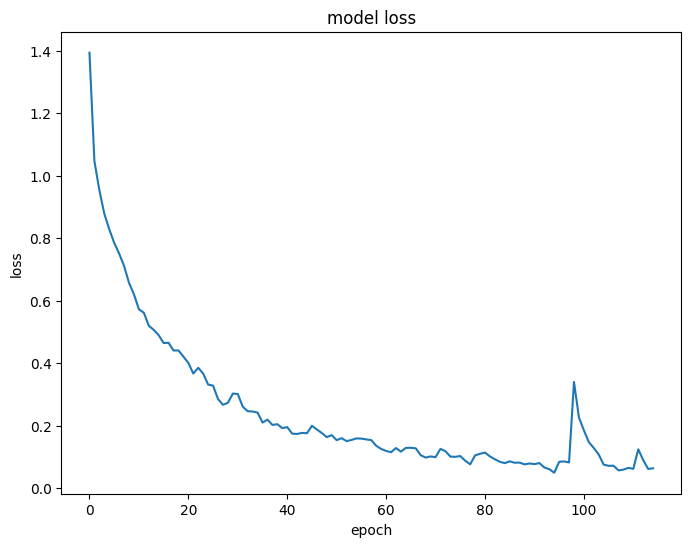

In [ ]:
plt.figure(figsize=(8, 6))
#plt.plot(history8.history['accuracy'])
plt.plot(history1.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
es2= EarlyStopping(monitor='loss',min_delta=0.0001, patience=20,verbose=1)

In [ ]:
mask_value=0.0
model2 = Sequential()
model2.add(Masking(mask_value = -1 , input_shape = X_train.shape[1:]))
model2.add(SimpleRNN(units=32,return_sequences=True))
model2.add(Dropout(0.2))
#model.add(SimpleRNN(units=64,return_sequences=True))
#model.add(Dropout(0.2))
model2.add(SimpleRNN(units=32))
model2.add(Dense(units=5, activation='softmax'))
model2.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
model2.summary()
history2=model2.fit(X_train, yt, callbacks=[es2],epochs=1000, batch_size=128)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_10 (Masking)        (None, 78, 39)            0         
                                                                 
 simple_rnn_11 (SimpleRNN)   (None, 78, 32)            2304      
                                                                 
 dropout_6 (Dropout)         (None, 78, 32)            0         
                                                                 
 simple_rnn_12 (SimpleRNN)   (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 5)                 165       
                                                                 
Total params: 4,549
Trainable params: 4,549
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
13/13 [==============================] 

In [ ]:
model2.save('/content/drive/MyDrive/model2a.h5')

In [ ]:
#Evaluating the model
print('\nEvaluation of model on train data:')
trainAcc2=model2.evaluate(x=X_train,y=yt,batch_size=1, verbose="auto",callbacks=None)
print(model2.metrics_names)
print(trainAcc2)
print('\nEvaluation of model on test data:')
testAcc2=model2.evaluate(x=X_test, y=ytest, batch_size=1, verbose="auto",callbacks=None)
print(model2.metrics_names)
print(testAcc2)
print('\nPredictions for test data:')
testProb2=model2.predict(X_test, batch_size=1, verbose="auto", callbacks=None)
pred2=np.argmax(testProb2,axis=1)
confusionMatrix2=tf.math.confusion_matrix(ytest,pred2)
print(confusionMatrix2)


Evaluation of model on train data:
1570/1570 [==============================] - 18s 11ms/step - loss: 0.0745 - accuracy: 0.9783
['loss', 'accuracy']
[0.07447732239961624, 0.9783439636230469]

Evaluation of model on test data:
393/393 [==============================] - 4s 10ms/step - loss: 0.6156 - accuracy: 0.8422
['loss', 'accuracy']
[0.6155537962913513, 0.8422392010688782]

Predictions for test data:
393/393 [==============================] - 5s 11ms/step
tf.Tensor(
[[ 56   0   3  11   2]
 [  0  35   4   2  11]
 [  1   2 120   1   2]
 [  9   0   2  84   1]
 [  1   5   3   2  36]], shape=(5, 5), dtype=int32)


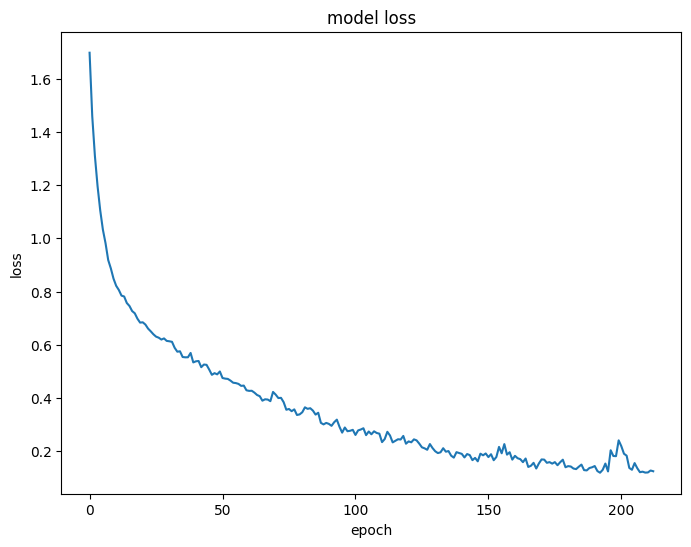

In [ ]:
plt.figure(figsize=(8, 6))
#plt.plot(history8.history['accuracy'])
plt.plot(history2.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
es3= EarlyStopping(monitor='loss',min_delta=0.0001, patience=20,verbose=1)

In [ ]:
mask_value=0.0
model3 = Sequential()
model3.add(Masking(mask_value = -1 , input_shape = X_train.shape[1:]))
model3.add(SimpleRNN(units=128,return_sequences=True))
model3.add(Dropout(0.2))
#model.add(SimpleRNN(units=64,return_sequences=True))
#model.add(Dropout(0.2))
model3.add(SimpleRNN(units=128))
model3.add(Dense(units=5, activation='softmax'))
model3.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
model3.summary()
history3=model3.fit(X_train, yt, callbacks=[es3],epochs=1000, batch_size=128)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_12 (Masking)        (None, 78, 39)            0         
                                                                 
 simple_rnn_15 (SimpleRNN)   (None, 78, 128)           21504     
                                                                 
 dropout_8 (Dropout)         (None, 78, 128)           0         
                                                                 
 simple_rnn_16 (SimpleRNN)   (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 5)                 645       
                                                                 
Total params: 55,045
Trainable params: 55,045
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
13/13 [==============================

In [ ]:
model3.save('/content/drive/MyDrive/model3a.h5')

In [ ]:
#Evaluating the model
print('\nEvaluation of model on train data:')
trainAcc3=model3.evaluate(x=X_train,y=yt,batch_size=1, verbose="auto",callbacks=None)
print(model3.metrics_names)
print(trainAcc3)
print('\nEvaluation of model on test data:')
testAcc3=model3.evaluate(x=X_test, y=ytest, batch_size=1, verbose="auto",callbacks=None)
print(model3.metrics_names)
print(testAcc3)
print('\nPredictions for test data:')
testProb3=model3.predict(X_test, batch_size=1, verbose="auto", callbacks=None)
pred3=np.argmax(testProb3,axis=1)
confusionMatrix3=tf.math.confusion_matrix(ytest,pred3)
print(confusionMatrix3)


Evaluation of model on train data:
1570/1570 [==============================] - 19s 12ms/step - loss: 0.0057 - accuracy: 0.9981
['loss', 'accuracy']
[0.005697829648852348, 0.9980891942977905]

Evaluation of model on test data:
393/393 [==============================] - 7s 17ms/step - loss: 0.5912 - accuracy: 0.8651
['loss', 'accuracy']
[0.5911537408828735, 0.8651399612426758]

Predictions for test data:
393/393 [==============================] - 4s 10ms/step
tf.Tensor(
[[ 66   1   2   1   2]
 [  0  36   4   1  11]
 [  1   1 122   1   1]
 [ 14   2   1  78   1]
 [  2   5   2   0  38]], shape=(5, 5), dtype=int32)


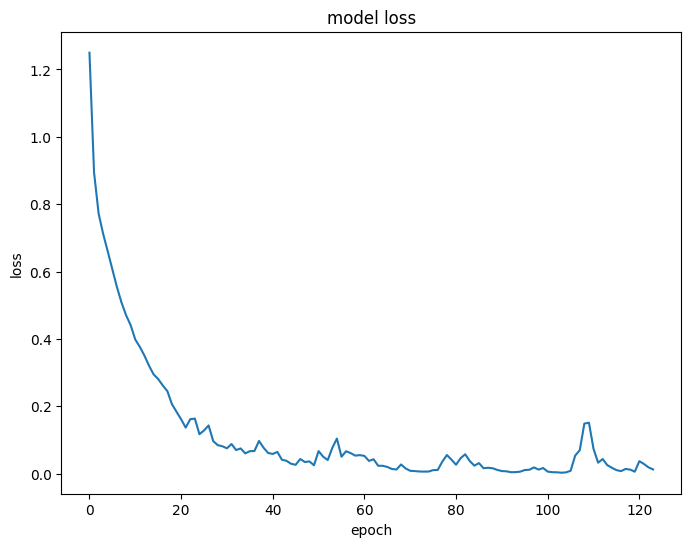

In [ ]:
plt.figure(figsize=(8, 6))
#plt.plot(history8.history['accuracy'])
plt.plot(history3.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
es6= EarlyStopping(monitor='loss',min_delta=0.0001, patience=20,verbose=1)

In [ ]:
mask_value=0.0
model6 = Sequential()
model6.add(Masking(mask_value = -1 , input_shape = X_train.shape[1:]))
model6.add(LSTM(units=32,return_sequences=True))
model6.add(Dropout(0.2))
#model.add(LSTM(units=32,return_sequences=True))
#model.add(Dropout(0.2))
model6.add(LSTM(units=32))
#model.add(Dropout(0.2))
model6.add(Dense(units=5, activation='softmax'))
model6.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
model6.summary()
history6=model6.fit(X_train, yt, callbacks=[es6],epochs=1000, batch_size=128)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_13 (Masking)        (None, 78, 39)            0         
                                                                 
 lstm (LSTM)                 (None, 78, 32)            9216      
                                                                 
 dropout_9 (Dropout)         (None, 78, 32)            0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense_9 (Dense)             (None, 5)                 165       
                                                                 
Total params: 17,701
Trainable params: 17,701
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
13/13 [==============================

In [ ]:
model6.save('/content/drive/MyDrive/model6a.h5')

In [ ]:
#Evaluating the model
print('\nEvaluation of model on train data:')
trainAcc6=model6.evaluate(x=X_train,y=yt,batch_size=1, verbose="auto",callbacks=None)
print(model6.metrics_names)
print(trainAcc6)
print('\nEvaluation of model on test data:')
testAcc6=model6.evaluate(x=X_test, y=ytest, batch_size=1, verbose="auto",callbacks=None)
print(model6.metrics_names)
print(testAcc6)
print('\nPredictions for test data:')
testProb6=model6.predict(X_test, batch_size=1, verbose="auto", callbacks=None)
pred6=np.argmax(testProb6,axis=1)
confusionMatrix6=tf.math.confusion_matrix(ytest,pred6)
print(confusionMatrix6)


Evaluation of model on train data:
1570/1570 [==============================] - 28s 16ms/step - loss: 0.0014 - accuracy: 1.0000
['loss', 'accuracy']
[0.00136483961250633, 1.0]

Evaluation of model on test data:
393/393 [==============================] - 6s 14ms/step - loss: 0.5418 - accuracy: 0.8982
['loss', 'accuracy']
[0.5418100357055664, 0.8982188105583191]

Predictions for test data:
393/393 [==============================] - 9s 15ms/step
tf.Tensor(
[[ 62   0   3   5   2]
 [  0  44   3   2   3]
 [  0   1 121   2   2]
 [  5   1   0  88   2]
 [  1   5   1   2  38]], shape=(5, 5), dtype=int32)


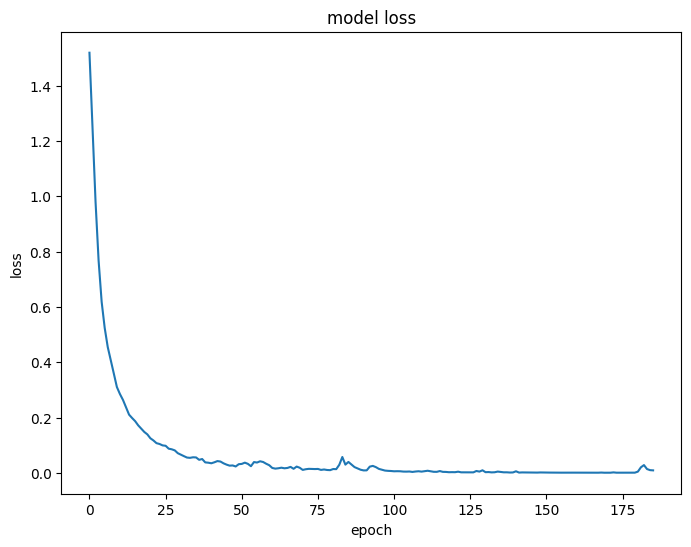

In [ ]:
plt.figure(figsize=(8, 6))
#plt.plot(history8.history['accuracy'])
plt.plot(history6.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
es7= EarlyStopping(monitor='loss',min_delta=0.0001, patience=20,verbose=1)

In [ ]:
mask_value=0.0
model7 = Sequential()
model7.add(Masking(mask_value = -1 , input_shape = X_train.shape[1:]))
model7.add(LSTM(units=64,return_sequences=True))
model7.add(Dropout(0.2))
#model.add(LSTM(units=32,return_sequences=True))
#model.add(Dropout(0.2))
model7.add(LSTM(units=64))
#model.add(Dropout(0.2))
model7.add(Dense(units=5, activation='softmax'))
model7.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
model7.summary()
history7=model7.fit(X_train, yt, callbacks=[es6],epochs=1000, batch_size=128)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_14 (Masking)        (None, 78, 39)            0         
                                                                 
 lstm_2 (LSTM)               (None, 78, 64)            26624     
                                                                 
 dropout_10 (Dropout)        (None, 78, 64)            0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dense_10 (Dense)            (None, 5)                 325       
                                                                 
Total params: 59,973
Trainable params: 59,973
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
13/13 [=============================

In [ ]:
model7.save('/content/drive/MyDrive/model7a.h5')

In [ ]:
print('\nEvaluation of model on train data:')
trainAcc7=model7.evaluate(x=X_train,y=yt,batch_size=1, verbose="auto",callbacks=None)
print(model7.metrics_names)
print(trainAcc7)
print('\nEvaluation of model on test data:')
testAcc7=model7.evaluate(x=X_test, y=ytest, batch_size=1, verbose="auto",callbacks=None)
print(model7.metrics_names)
print(testAcc7)
print('\nPredictions for test data:')
testProb7=model7.predict(X_test, batch_size=1, verbose="auto", callbacks=None)
pred7=np.argmax(testProb7,axis=1)
confusionMatrix7=tf.math.confusion_matrix(ytest,pred7)
print(confusionMatrix7)


Evaluation of model on train data:
1570/1570 [==============================] - 30s 18ms/step - loss: 0.0012 - accuracy: 1.0000
['loss', 'accuracy']
[0.0011769839329645038, 1.0]

Evaluation of model on test data:
393/393 [==============================] - 8s 19ms/step - loss: 0.4485 - accuracy: 0.9084
['loss', 'accuracy']
[0.4484984874725342, 0.9083969593048096]

Predictions for test data:
393/393 [==============================] - 9s 15ms/step
tf.Tensor(
[[ 63   0   1   6   2]
 [  0  49   2   0   1]
 [  0   3 120   3   0]
 [  7   0   1  87   1]
 [  0   5   2   2  38]], shape=(5, 5), dtype=int32)


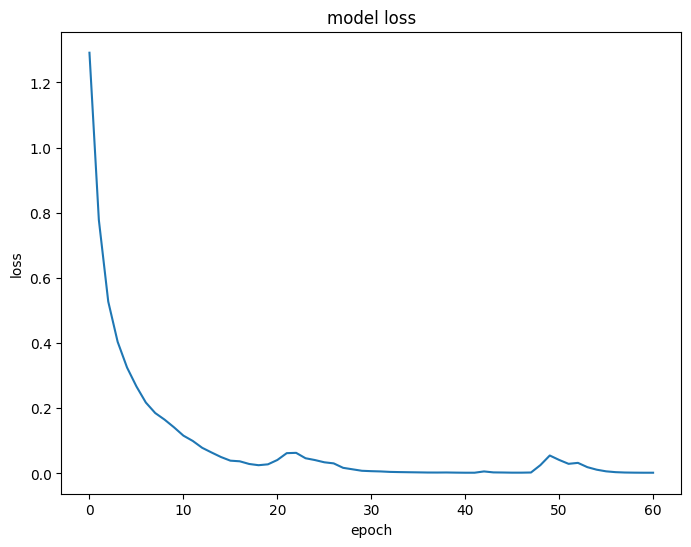

In [ ]:
plt.figure(figsize=(8, 6))
#plt.plot(history8.history['accuracy'])
plt.plot(history7.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
es8= EarlyStopping(monitor='loss',min_delta=0.0001, patience=20,verbose=1)

In [ ]:
mask_value=0.0
model8 = Sequential()
model6.add(Masking(mask_value = -1 , input_shape = X_train.shape[1:]))
model8.add(LSTM(units=128,return_sequences=True))
model8.add(Dropout(0.2))
#model.add(LSTM(units=32,return_sequences=True))
#model.add(Dropout(0.2))
model8.add(LSTM(units=128))
#model.add(Dropout(0.2))
model8.add(Dense(units=5, activation='softmax'))
model8.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
#model8.summary()
history8=model8.fit(X_train, yt, callbacks=[es8],epochs=1000, batch_size=128)

Epoch 1/1000
13/13 [==============================] - 13s 545ms/step - loss: 1.5749 - accuracy: 0.3006
Epoch 2/1000
13/13 [==============================] - 8s 634ms/step - loss: 1.5583 - accuracy: 0.3191
Epoch 3/1000
13/13 [==============================] - 10s 734ms/step - loss: 1.5510 - accuracy: 0.3204
Epoch 4/1000
13/13 [==============================] - 12s 919ms/step - loss: 1.5461 - accuracy: 0.3204
Epoch 5/1000
13/13 [==============================] - 12s 957ms/step - loss: 1.5344 - accuracy: 0.3204
Epoch 6/1000
13/13 [==============================] - 10s 781ms/step - loss: 1.4046 - accuracy: 0.4217
Epoch 7/1000
13/13 [==============================] - 8s 579ms/step - loss: 1.2191 - accuracy: 0.4904
Epoch 8/1000
13/13 [==============================] - 6s 463ms/step - loss: 1.1620 - accuracy: 0.5102
Epoch 9/1000
13/13 [==============================] - 8s 621ms/step - loss: 0.9359 - accuracy: 0.5643
Epoch 10/1000
13/13 [==============================] - 6s 460ms/step - loss: 

In [ ]:
model8.save('/content/drive/MyDrive/model8a.h5')

In [ ]:
#Evaluating the model
print('\nEvaluation of model on train data:')
trainAcc8=model8.evaluate(x=X_train,y=yt,batch_size=1, verbose="auto",callbacks=None)
print(model8.metrics_names)
print(trainAcc8)
print('\nEvaluation of model on test data:')
testAcc8=model8.evaluate(x=X_test, y=ytest, batch_size=1, verbose="auto",callbacks=None)
print(model8.metrics_names)
print(testAcc8)
print('\nPredictions for test data:')
testProb8=model8.predict(X_test, batch_size=1, verbose="auto", callbacks=None)
pred8=np.argmax(testProb8,axis=1)
confusionMatrix8=tf.math.confusion_matrix(ytest,pred8)
print(confusionMatrix8)


Evaluation of model on train data:
1570/1570 [==============================] - 25s 16ms/step - loss: 0.0302 - accuracy: 0.9924
['loss', 'accuracy']
[0.03021947480738163, 0.9923567175865173]

Evaluation of model on test data:
393/393 [==============================] - 7s 17ms/step - loss: 0.5744 - accuracy: 0.8830
['loss', 'accuracy']
[0.5743754506111145, 0.8829516768455505]

Predictions for test data:
393/393 [==============================] - 5s 13ms/step
tf.Tensor(
[[ 60   1   2   7   2]
 [  0  43   0   2   7]
 [  1   1 121   1   2]
 [ 11   0   1  83   1]
 [  1   4   1   1  40]], shape=(5, 5), dtype=int32)


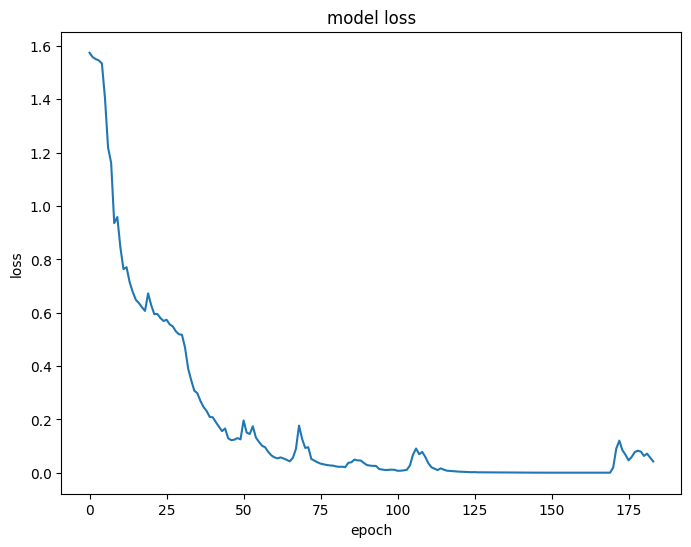

In [ ]:
plt.figure(figsize=(8, 6))
#plt.plot(history8.history['accuracy'])
plt.plot(history8.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()